# Littlemore Parish Council LTN questionnaire analysis

## Data collection

Data was collected in October 2021 via distributing paper copies of this questionnaire (TODO: link to questionnaire). Questionnaires were only distributed to those who were in when we knocked on the door then we went round a second time to pick them up. From experience, this gets significantly better engagement than simply dropping the questionnaire through the door with no interaction. 

We decided to not use an online option as 
- easy to brigade (i.e. spam with multiple responses)
- more difficult to get good geographic coverage throughout Littlemore
- not as accessible for older people
- expected lower engagement, with only the most engaged already taking part

Limitations:

- Flats were difficult to do so we have poor coverage here
- We did not have time nor the manpower to visit multiple times so there will be a bias to those who are in early evening (5-7pm ish)

## Anonymisation (TODO)

To make it impossible (as far as possible) to not identify individuals from the data. 

Only identifiable data is street name (collected no demographic data like age) so we bundle streets together geographically if there are less than three responses for a single street. This has been done before this notebook - this notebook works on the anonymised data.

## Notes on specific questions


### Question 2

Raw numbers difficult to use without knowing number of people in household. 

### Question 3 

Unsure if people are filling this in as intented (i.e. missing the "driving" aspect). Should've been more carefully worded. Needed a "don't drive" box. 

### Question 4

A number of people missed this question; placement right at the top of the page made it less obvious?

### Question 5

Where people circled an option for some of the filters, I circled "No opinion" for the blank ones. Kind of regret starting to do this, but kept doing it to be consistent. 

### Question 7 and 8

Some normalisation happened here when transcribing *e.g.*
- "It takes a long time to get to my destination" -> "Longer journeys"
- Mapped a lot of related things to "traffic displacement" 
- Only written "None" if something was written there (normalised, e.g. "Nothing", "I can't see any benefit")

This was to:
- Make it easier and quicker to input, without losing data
- Make it easier to analyse later

### Question 10

A lot of people used this for expanding on Question 8 (problem with LTN) rather than thinking of other solutions. Negatives of the LTN were moved to Question 8 responses. Similar to the free-text fields of Questions 7 and 8, some paraphrasing took place. 

## Bad data

Only spotted a couple of obvious duplicates (same hand writing, same pen, very similar content, same road). These were removed from the data. 

## Missed opportunities

Should've asked:
- number of people in household
- number of cars in household
- age data


In [128]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [129]:
data = "data/anonymised_responses.csv"

## Clean up column names so don't have to deal with spaces

In [130]:
df = pd.read_csv(data)
df.rename(
    columns={
        "Timestamp": "timestamp",
        "Street or Road Name": "street",
        "Email Address": "email",
        "1: Are you in favour of reducing traffic in Littlemore?": "1_reduce_traffic",
        "2: How many journeys per week do you make - CAR - BEFORE LTN": "2_car_before",
        "2: How many journeys per week do you make - CAR - AFTER LTN": "2_car_after",
        "2: How many journeys per week do you make - MOTORBIKE - BEFORE LTN": "2_motorbike_before",
        "2: How many journeys per week do you make - MOTORBIKE - AFTER LTN": "2_motorbike_after",
        "2: How many journeys per week do you make - VAN - BEFORE LTN": "2_van_before",
        "2: How many journeys per week do you make - VAN - AFTER LTN": "2_van_after",
        "2: How many journeys per week do you make - BUS - BEFORE LTN": "2_bus_before",
        "2: How many journeys per week do you make - BUS - AFTER LTN": "2_bus_after",
        "2: How many journeys per week do you make - FOOT - BEFORE LTN": "2_foot_before",
        "2: How many journeys per week do you make - FOOT - AFTER LTN": "2_foot_after",
        "2: How many journeys per week do you make - WHEELCHAIR etc - BEFORE LTN": "2_wheelchair_before",
        "2: How many journeys per week do you make - WHEELCHAIR etc - AFTER LTN": "2_wheelchair_after",
        "2: How many journeys per week do you make - BIKE - BEFORE LTN": "2_bike_before",
        "2: How many journeys per week do you make - BIKE - AFTER LTN": "2_bike_after",
        "2: How many journeys per week do you make - SCOOTER - BEFORE LTN": "2_scooter_before",
        "2: How many journeys per week do you make - SCOOTER - AFTER LTN": "2_scooter_after",
        "3: If you drive, the reasons for this are:": "3_drive_reasons",
        "4. Overall, the LTN's impact on you has been:": "4_ltn_impact",
        "5. Location of traffic filters: Church Hill Road": "5_church_hill_road",
        "5. Location of traffic filters: Beauchamp Lane": "5_beauchamp_lane",
        "5. Location of traffic filters: Littlemore Road": "5_littlemore_road",
        "5. Location of traffic filters: Mayfair Road": "5_mayfair_road",
        "5. Location of traffic filters: Liddell Road": "5_liddell_road",
        "5. Location of traffic filters: Bartholomew Road": "5_bartholomew_road",
        "6: Do you think the current Cowley LTNs should be": "6_ltn_future",
        "7:  What is the biggest benefit of the LTNs?": "7_ltn_benefit",
        "8: What is the biggest problem of the LTNs?": "8_ltn_problem",
        "9: Have you filled in the county's online LTN consultation?": "9_consultation",
        "10. Do you have any other comments or ideas to improve traffic in our area?": "10_traffic_ideas",
    },
    inplace=True,
)
df.head()

,street,Secondary street name,1_reduce_traffic,2_car_before,2_car_after,2_motorbike_before,2_motorbike_after,2_van_before,2_van_after,2_bus_before,2_bus_after,2_foot_before,2_foot_after,2_wheelchair_before,2_wheelchair_after,2_bike_before,2_bike_after,2_scooter_before,2_scooter_after,3_drive_reasons,4_ltn_impact,5_church_hill_road,5_beauchamp_lane,5_littlemore_road,5_mayfair_road,5_liddell_road,5_bartholomew_road,6_ltn_future,7_ltn_benefit,8_ltn_problem,9_consultation,10_traffic_ideas,Unnamed: 32
0,Alice Smith Square,NaN,No,6,6,NaN,NaN,NaN,NaN,1,1,3,3,NaN,NaN,NaN,NaN,NaN,NaN,"Shopping, Health appointments, Caring responsi...",5.0,Remove,Remove,Remove,Remove,Remove,Remove,Removed,None,Can't get anywhere; sitting in traffic; traffi...,No,Remove LTNs,NaN
1,Alice Smith Square,NaN,No,2,2,NaN,NaN,NaN,NaN,NaN,NaN,5,5,NaN,NaN,NaN,NaN,NaN,NaN,Caring responsibilities,5.0,Remove,Remove,Remove,Remove,Remove,Remove,Removed,None,Disrupt deliveries; traffic displacement,Yes,- Remove eScooters\n- Raise pavements at T jun...,NaN
2,Alice Smith Square,NaN,No,20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Work, Shopping, Health appointments",4.0,No opinion,No opinion,Remove,No opinion,No opinion,Agree,Removed,Encourages people to walk more,Causes a lot of traffic,Yes,NaN,NaN
3,Alice Smith Square,NaN,No,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Work, Shopping, Health appointments",5.0,Remove,Remove,Remove,Remove,Remove,Remove,Removed,None if you live in Littlemore,Littlemore cutoff; emergency service access; N...,No,NaN,NaN
4,Alice Smith Square,NaN,NaN,20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Work, Shopping, Gyms",5.0,Remove,Remove,Remove,Remove,Remove,Remove,Removed,None,Traffic displacement; emergency service access...,No,Remove LTNs,NaN


## Add in street level data

In [131]:
streets = pd.read_csv("data/street_data.csv")
deprivation_by_lsoa = pd.read_csv("data/littlemore_deprivation_index_by_lsoa.csv")
littlemore_lsoa_mappings = pd.read_csv("data/littlemore_lsoa_mappings.csv")
streets.head()

,street,count,inside_ltn,borders_ltn,in_littlemore_parish,cul_de_sac,postcode,latitude,longitude,driving_distance_to_ltn_meters
0,Addison Drive,19,1,0,1,0,OX4 3UD,51.726362,-1.218138,338.8
1,Alice Smith Square,95,0,0,1,1,OX4 4NF,51.720830,-1.217460,1197.6
2,Astrop Lane,18,0,0,1,1,OX4 4FW,51.719944,-1.226774,1336.4
3,Bampton Close,30,0,0,1,1,OX4 6NN,51.723830,-1.211400,1807.2
4,Barberi Close,24,0,0,1,1,OX4 4GF,51.721360,-1.221830,1005.5


In [132]:
deprivation_by_lsoa.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Overall Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01028552,Oxford 016A,E07000178,Oxford,34.019,6262,2,0.249,4095,2,1782,481,1016,285,1034
1,E01028553,Oxford 016B,E07000178,Oxford,30.507,7785,3,0.164,9267,3,1775,376,1124,275,1150
2,E01028554,Oxford 016C,E07000178,Oxford,20.481,13951,5,0.153,10213,4,1389,268,843,278,858
3,E01028555,Oxford 016D,E07000178,Oxford,15.847,18079,6,0.081,19405,6,1544,314,945,285,944


In [133]:
littlemore_lsoa_mappings.head()

,pcd7,pcd8,pcds,dointr,doterm,usertype,oa11cd,lsoa11cd,msoa11cd,ladcd,lsoa11nm,msoa11nm,ladnm,ladnmw
0,OX4 4FW,OX4 4FW,OX4 4FW,201005,NaN,0,E00145477,E01028552,E02005955,E07000178,Oxford 016A,Oxford 016,Oxford,NaN
1,OX4 4GG,OX4 4GG,OX4 4GG,201012,NaN,0,E00145477,E01028552,E02005955,E07000178,Oxford 016A,Oxford 016,Oxford,NaN
2,OX4 4GQ,OX4 4GQ,OX4 4GQ,201506,NaN,0,E00145465,E01028552,E02005955,E07000178,Oxford 016A,Oxford 016,Oxford,NaN
3,OX4 4LD,OX4 4LD,OX4 4LD,198001,NaN,0,E00145474,E01028552,E02005955,E07000178,Oxford 016A,Oxford 016,Oxford,NaN
4,OX4 4LJ,OX4 4LJ,OX4 4LJ,198001,NaN,0,E00145477,E01028552,E02005955,E07000178,Oxford 016A,Oxford 016,Oxford,NaN


Join some of these columns to get deprivation index in `streets` dataframe

In [134]:
postcodes = pd.merge(
    littlemore_lsoa_mappings[["pcd7", "lsoa11cd"]],
    deprivation_by_lsoa[
        ["LSOA code (2011)", "Overall Index of Multiple Deprivation (IMD) Score"]
    ],
    left_on="lsoa11cd",
    right_on="LSOA code (2011)",
)
postcodes.drop("LSOA code (2011)", axis=1, inplace=True)
postcodes.rename(
    columns={
        "pcd7": "postcode",
        "lsoa11cd": "lsoa",
        "Overall Index of Multiple Deprivation (IMD) Score": "imd_score",
    },
    inplace=True,
)
postcodes.head()

,postcode,lsoa,imd_score
0,OX4 4FW,E01028552,34.019
1,OX4 4GG,E01028552,34.019
2,OX4 4GQ,E01028552,34.019
3,OX4 4LD,E01028552,34.019
4,OX4 4LJ,E01028552,34.019


Merge with streets data

In [135]:
streets.merge(postcodes, left_on="postcode", right_on="postcode")
streets.head()

,street,count,inside_ltn,borders_ltn,in_littlemore_parish,cul_de_sac,postcode,latitude,longitude,driving_distance_to_ltn_meters
0,Addison Drive,19,1,0,1,0,OX4 3UD,51.726362,-1.218138,338.8
1,Alice Smith Square,95,0,0,1,1,OX4 4NF,51.720830,-1.217460,1197.6
2,Astrop Lane,18,0,0,1,1,OX4 4FW,51.719944,-1.226774,1336.4
3,Bampton Close,30,0,0,1,1,OX4 6NN,51.723830,-1.211400,1807.2
4,Barberi Close,24,0,0,1,1,OX4 4GF,51.721360,-1.221830,1005.5


In [136]:
# Convert various columns to booleans
streets["cul_de_sac"] = streets["cul_de_sac"].astype("bool")
streets["inside_ltn"] = streets["inside_ltn"].astype("bool")
streets["borders_ltn"] = streets["borders_ltn"].astype("bool")
streets["outside_ltn"] = ~streets[["inside_ltn", "borders_ltn"]].any(
    axis="columns"
)  # note the negation
streets["in_littlemore_parish"] = streets["in_littlemore_parish"].astype("bool")
streets = streets[
    [
        "street",
        "count",
        "inside_ltn",
        "borders_ltn",
        "outside_ltn",
        "in_littlemore_parish",
        "cul_de_sac",
        "postcode",
        "latitude",
        "longitude",
        "driving_distance_to_ltn_meters",
    ]
]
streets.head()

,street,count,inside_ltn,borders_ltn,outside_ltn,in_littlemore_parish,cul_de_sac,postcode,latitude,longitude,driving_distance_to_ltn_meters
0,Addison Drive,19,True,False,False,True,False,OX4 3UD,51.726362,-1.218138,338.8
1,Alice Smith Square,95,False,False,True,True,True,OX4 4NF,51.720830,-1.217460,1197.6
2,Astrop Lane,18,False,False,True,True,True,OX4 4FW,51.719944,-1.226774,1336.4
3,Bampton Close,30,False,False,True,True,True,OX4 6NN,51.723830,-1.211400,1807.2
4,Barberi Close,24,False,False,True,True,True,OX4 4GF,51.721360,-1.221830,1005.5


Merge with full data

In [137]:
df = pd.merge(df, streets, how="left", on="street")
df.columns

Index(['street', 'Secondary street name', '1_reduce_traffic', '2_car_before',
       '2_car_after', '2_motorbike_before', '2_motorbike_after',
       '2_van_before', '2_van_after', '2_bus_before', '2_bus_after',
       '2_foot_before', '2_foot_after', '2_wheelchair_before',
       '2_wheelchair_after', '2_bike_before', '2_bike_after',
       '2_scooter_before', '2_scooter_after', '3_drive_reasons',
       '4_ltn_impact', '5_church_hill_road', '5_beauchamp_lane',
       '5_littlemore_road', '5_mayfair_road', '5_liddell_road',
       '5_bartholomew_road', '6_ltn_future', '7_ltn_benefit', '8_ltn_problem',
       '9_consultation', '10_traffic_ideas', 'Unnamed: 32', 'count',
       'inside_ltn', 'borders_ltn', 'outside_ltn', 'in_littlemore_parish',
       'cul_de_sac', 'postcode', 'latitude', 'longitude',
       'driving_distance_to_ltn_meters'],
      dtype='object')

## Proportions of streets covered

In [138]:
# Read in counts from `street_counts.csv` as anonymisation has amalgamated some streets in the main dataset
street_counts = pd.read_csv('data/street_counts.csv')
street_counts.rename(columns={'num_respondents':'count'}, inplace=True)
street_counts.head()

,street,count
0,Alice Smith Square,36
1,Astrop Lane,7
2,Bampton Close,10
3,Barberi Close,6
4,Bodley Road,16


In [139]:
coverage = pd.merge(streets, street_counts, how="left", on=["street"]).rename(
    columns={"count_x": "total", "count_y": "num_responses"}
)
coverage["coverage"] = coverage["num_responses"] / coverage["total"]
coverage[coverage["coverage"].notna()].sort_values(by=["coverage"], ascending=False)[
    ["street", "total", "num_responses", "coverage"]
]

,street,total,num_responses,coverage
22,Fairlie Road,16,14.0,0.875000
38,Long Wall,12,10.0,0.833333
56,Sandford Road,17,12.0,0.705882
50,Pipley Furlong,17,11.0,0.647059
14,Compass Close,14,9.0,0.642857
59,Spring Lane,35,22.0,0.628571
18,Dudgeon Drive,34,21.0,0.617647
55,Redmoor Close,15,9.0,0.600000
20,Elm Tree Close,10,6.0,0.600000
6,Broadfields,53,31.0,0.584906


In [140]:
coverage[coverage["num_responses"].isna()].sort_values(by=["coverage"])[
    ["street", "total", "num_responses", "coverage"]
]

,street,total,num_responses,coverage
0,Addison Drive,19,NaN,NaN
7,Brocklesby Road,18,NaN,NaN
17,Denny Gardens,48,NaN,NaN
19,Eastern Avenue,64,NaN,NaN
21,Faber Close,8,NaN,NaN
23,Giles Close,11,NaN,NaN
24,Giles Road,63,NaN,NaN
25,Goodey Close,16,NaN,NaN
27,Gwyneth Road,35,NaN,NaN
28,Hardings Close,16,NaN,NaN


In [141]:
set(street_counts["street"]).difference(
    set(coverage[coverage["num_responses"].notna()]["street"])
)  # Street names we can't deal with

set()

In [142]:
# Total number of houses
sum(coverage["total"])

2649

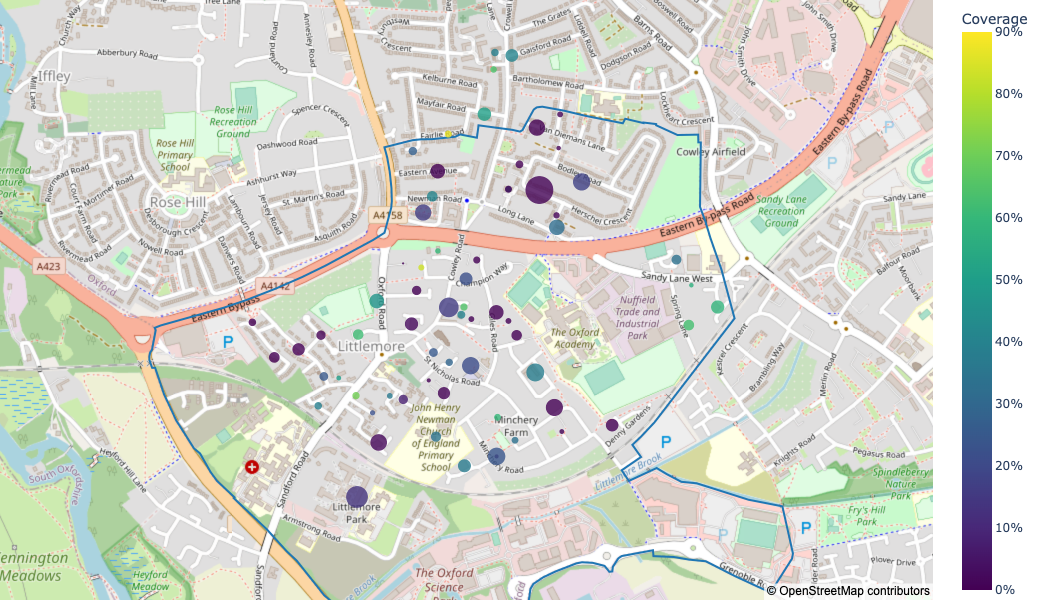

In [143]:
import json

import geopandas

import plotly.express as px

gdf = geopandas.read_file("data/mapping/littlemore_parish.geojson")

fig = px.scatter_mapbox(
    coverage.fillna(0),
    lat="latitude",
    lon="longitude",
    color="coverage",
    size="total",
    color_continuous_scale="Viridis",
    opacity=0.8,
    zoom=14,
    height=600,
    width=1000,
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(
    coloraxis_colorbar=dict(title="Coverage", tickformat=".0%"),
)
fig.update_layout(
    coloraxis=dict(cmin=0.0, cmax=0.9),
)
fig.update_layout(
    mapbox_layers=[
        {
            "source": json.loads(gdf.geometry.to_json()),
            "below": "traces",
            "type": "line",
            "color": "#1f77b4",
            "line": {"width": 2.0},
        }
    ]
)
fig.write_image("img/15_coverage_map.png")
fig.show()

# Clean up data from question 2 🛠️

- Where we have data like `1-2`, replace with average of two values
- Other strings, replace with `1` to indicate non-negative usage

In [144]:
def average_usage_range(input_: str) -> float:
    if isinstance(input_, str) and "-" in input_:
        bottom, top = input_.split("-")
        return (int(bottom) + int(top)) / 2
    return input_


list(map(average_usage_range, ["5-10", "NaN", "5", "Yes"]))

[7.5, 'NaN', '5', 'Yes']

In [145]:
def get_zeros(input_: str) -> float:
    if isinstance(input_, str) and "0" in input_:
        return 0
    return input_


list(
    map(
        get_zeros,
        [
            "0 (moved in before LTN)",
            "(0 because moved in after installation)",
            "5",
            "Yes",
        ],
    )
)

[0, 0, '5', 'Yes']

In [146]:
def drop_reason(input_: str) -> float:
    if isinstance(input_, str) and " (" in input_:
        try:
            return float(input_.split(" (")[0])
        except ValueError:
            pass

    return input_


list(
    map(drop_reason, ["0 (moved in before LTN)", "5 (taxi)", "2.0 (COVID)", "Yes", "5"])
)

[0.0, 5.0, 2.0, 'Yes', '5']

In [147]:
def drop_modifiers(input_: str):
    """i.e. <, > and + signs"""
    if isinstance(input_, str):
        for modifier in ["<", ">", "+"]:
            if modifier in input_:
                try:
                    return float(
                        input_.replace(modifier, "")
                    )  # assuming only one modifier exists
                except ValueError:
                    input_.replace(modifier, "")
    return input_


list(map(drop_modifiers, ["<10", "10+", ">10", "5 (taxi)", "2.0 (COVID)", "Yes", "5"]))

[10.0, 10.0, 10.0, '5 (taxi)', '2.0 (COVID)', 'Yes', '5']

In [148]:
list_of_columns_to_clean = [
    "2_car_before",
    "2_car_after",
    "2_motorbike_before",
    "2_motorbike_after",
    "2_van_before",
    "2_van_after",
    "2_bus_before",
    "2_bus_after",
    "2_foot_before",
    "2_foot_after",
    "2_wheelchair_before",
    "2_wheelchair_before",
    "2_bike_before",
    "2_bike_after",
    "2_scooter_before",
    "2_scooter_after",
]

for col_name in list_of_columns_to_clean:
    df[col_name] = (
        df[col_name]
        .apply(average_usage_range)
        .apply(get_zeros)
        .apply(drop_reason)
        .apply(drop_modifiers)
    )

df[["2_car_before", "2_car_after"]]

,2_car_before,2_car_after
0,6,6
1,2,2
2,0,0
3,7,2
4,0,0
...,...,...
523,Yes,Yes
524,3,3
525,0,0
526,0,0


## Create some extra travel mode columns

- `active_travel_before` and `active_travel_after` (float): sum of any active travel indicated, where active travel = [walk, bike, wheelchair, scooter]
- `car_change` (float): different in car use before -> after LTN installation
- `active_travel_change` (float): different in active travel use before/after LTN installation

In [149]:
df["car_change"] = df["2_car_after"].apply(pd.to_numeric, errors="coerce") - df[
    "2_car_before"
].apply(pd.to_numeric, errors="coerce")
df[["2_car_before", "2_car_after", "car_change"]]

,2_car_before,2_car_after,car_change
0,6,6,0.0
1,2,2,0.0
2,0,0,0.0
3,7,2,-5.0
4,0,0,0.0
...,...,...,...
523,Yes,Yes,NaN
524,3,3,0.0
525,0,0,0.0
526,0,0,0.0


In [150]:
df["active_travel_before"] = (
    df["2_foot_before"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_wheelchair_before"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_bike_before"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_scooter_before"].apply(pd.to_numeric, errors="coerce").fillna(0)
)
df["active_travel_after"] = (
    df["2_foot_after"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_wheelchair_after"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_bike_after"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_scooter_after"].apply(pd.to_numeric, errors="coerce").fillna(0)
)
df["active_travel_change"] = df["active_travel_after"] - df["active_travel_before"]
df[["active_travel_before", "active_travel_after", "active_travel_change"]]

,active_travel_before,active_travel_after,active_travel_change
0,3.0,3.0,0.0
1,5.0,5.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
523,0.0,0.0,0.0
524,7.0,7.0,0.0
525,5.0,5.0,0.0
526,3.0,3.0,0.0


## Calculate active travel proportion

In [151]:
df.columns

Index(['street', 'Secondary street name', '1_reduce_traffic', '2_car_before',
       '2_car_after', '2_motorbike_before', '2_motorbike_after',
       '2_van_before', '2_van_after', '2_bus_before', '2_bus_after',
       '2_foot_before', '2_foot_after', '2_wheelchair_before',
       '2_wheelchair_after', '2_bike_before', '2_bike_after',
       '2_scooter_before', '2_scooter_after', '3_drive_reasons',
       '4_ltn_impact', '5_church_hill_road', '5_beauchamp_lane',
       '5_littlemore_road', '5_mayfair_road', '5_liddell_road',
       '5_bartholomew_road', '6_ltn_future', '7_ltn_benefit', '8_ltn_problem',
       '9_consultation', '10_traffic_ideas', 'Unnamed: 32', 'count',
       'inside_ltn', 'borders_ltn', 'outside_ltn', 'in_littlemore_parish',
       'cul_de_sac', 'postcode', 'latitude', 'longitude',
       'driving_distance_to_ltn_meters', 'car_change', 'active_travel_before',
       'active_travel_after', 'active_travel_change'],
      dtype='object')

In [152]:
df["total_trips_per_week_before"] = (
    df["2_car_before"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_motorbike_before"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_van_before"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_bus_before"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["active_travel_before"]
)
df["total_trips_per_week_after"] = (
    df["2_car_after"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_motorbike_after"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_van_after"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_bus_after"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["active_travel_after"]
)
df["active_travel_prop_before"] = (
    df["active_travel_before"] / df["total_trips_per_week_before"]
)
df["active_travel_prop_after"] = (
    df["active_travel_after"] / df["total_trips_per_week_after"]
)
df["active_travel_prop_mean"] = df[
    ["active_travel_prop_before", "active_travel_prop_after"]
].mean(axis=1)
df[
    ["active_travel_prop_before", "active_travel_prop_after", "active_travel_prop_mean"]
].head(10)

,active_travel_prop_before,active_travel_prop_after,active_travel_prop_mean
0,0.300000,0.300000,0.300000
1,0.714286,0.714286,0.714286
2,NaN,NaN,NaN
3,0.000000,0.000000,0.000000
4,NaN,NaN,NaN
5,0.333333,0.666667,0.500000
6,NaN,NaN,NaN
7,0.125000,0.125000,0.125000
8,NaN,NaN,NaN
9,NaN,NaN,NaN


# Question 2 - Let's look at some active travel 🚴 🛴 🚶 👩‍🦽

In [153]:
# Households with zero active travel journeys before LTN installation
sum(df["active_travel_before"] == 0.0)

290

In [154]:
# Households with postive active travel journeys before LTN
sum(df["active_travel_before"] > 0.0)

238

In [155]:
# Households with zero active travel journeys after LTN installation
sum(df["active_travel_after"] == 0.0)

285

In [156]:
# Households with positive active travel journeys after LTN installation
sum(df["active_travel_after"] > 0.0)

243

In [157]:
# Number of households with a positive active travel change
sum(df["active_travel_change"] > 0)

47

In [158]:
# Number of households with a negative active travel change
sum(df["active_travel_change"] < 0)

20

In [159]:
# Number of households nonzero active travel with no change
sum((df["active_travel_change"] == 0) & (df["active_travel_before"] > 0))

186

In [160]:
# Average size of active travel positive change
df["active_travel_change"][df["active_travel_change"] > 0].mean()

5.042553191489362

In [161]:
# Households with modal shift from cars to active travel
sum((df["active_travel_change"] > 0) & (df["car_change"] < 0))

22

In [162]:
# Households with "negative" modal shift from active travel to cars
sum((df["active_travel_change"] < 0) & (df["car_change"] > 0))

3

In [163]:
sum(df["car_change"] < 0)

63

In [164]:
sum(df["car_change"] > 0)

28

## Active travel proportion

[(-0.1, 1.1)]

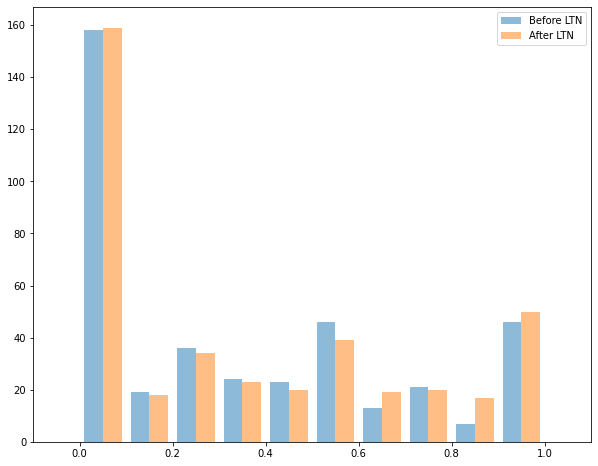

In [165]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.hist(
    [df["active_travel_prop_before"], df["active_travel_prop_after"]],
    bins=10,
    alpha=0.5,
    label=["Before LTN", "After LTN"],
)
plt.legend(loc="upper right")
ax.set(xlim=(-0.1, 1.1))

## Should probably look at buses a bit 🚌

In [166]:
df["bus_change"] = df["2_bus_after"].apply(pd.to_numeric, errors="coerce") - df[
    "2_bus_before"
].apply(pd.to_numeric, errors="coerce")
df[["2_bus_before", "2_bus_after", "bus_change"]]

,2_bus_before,2_bus_after,bus_change
0,1,1,0.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
523,NaN,NaN,NaN
524,NaN,NaN,NaN
525,NaN,NaN,NaN
526,NaN,NaN,NaN


In [167]:
sum(df["2_bus_before"].notna())

122

In [168]:
sum(df["2_bus_after"].notna())

122

In [169]:
# Number of households with a positive bus use change
sum(df["bus_change"] > 0)

10

In [170]:
# Number of households with a negative bus use change
sum(df["bus_change"] < 0)

8

## Now scooters 🛴

In [171]:
# Scooter use before LTN (and before Voi scooter docks installed)
sum(df["2_scooter_before"].apply(pd.to_numeric, errors="coerce") > 0)

3

In [172]:
# Scooter use after LTN (and after Voi scooter docks installed)
sum(df["2_scooter_after"].apply(pd.to_numeric, errors="coerce") > 0)

6

## Wheelchair data 👩‍🦽

In [173]:
# Wheelchair and mobility scooter use before LTN
sum(df["2_wheelchair_before"].apply(pd.to_numeric, errors="coerce") > 0)

4

In [174]:
# Wheelchair and mobility scooter use after LTN
sum(df["2_wheelchair_after"].apply(pd.to_numeric, errors="coerce") > 0)

3

# Question 1 - "Do you agree with reducing traffic in Littlemore?"

In [175]:
# There has to be a better way of doing this
good_index_order = (
    df.groupby("cul_de_sac")["1_reduce_traffic"]
    .value_counts(dropna=False, normalize=True)[1.0]
    .index
)
good_index_order

Index(['Yes', 'No', 'No opinion', nan], dtype='object', name='1_reduce_traffic')

In [176]:
df.groupby("cul_de_sac")["1_reduce_traffic"].value_counts(dropna=False, normalize=True)[
    0.0
][good_index_order]

1_reduce_traffic
Yes           0.575893
No            0.218750
No opinion    0.093750
NaN           0.111607
Name: 1_reduce_traffic, dtype: float64

In [177]:
# Split on LTN future
conditions = [
    (df["6_ltn_future"] == "Kept as is")
    | (df["6_ltn_future"] == "Kept with alterations"),
    (df["6_ltn_future"] == "Removed"),
    (df["6_ltn_future"] == "Don't know"),
]
values = ["Keep", "Remove", "Neutral"]
df["6_ltn_future_simple"] = np.select(conditions, values)
ltn_future = df.groupby("6_ltn_future_simple")["1_reduce_traffic"].value_counts(
    dropna=False, normalize=True
)

# Split on active travel
conditions = [
    (df["active_travel_after"] > 0.0),
    (df["active_travel_after"] == 0.0),
]
values = [True, False]
df["active_travel_after_bool"] = np.select(conditions, values).astype(bool)
active_travel = df.groupby("active_travel_after_bool")["1_reduce_traffic"].value_counts(
    dropna=False, normalize=True
)

# Split on living in cul-de-sac
cul_de_sac = df.groupby("cul_de_sac")["1_reduce_traffic"].value_counts(
    dropna=False, normalize=True
)

results = {
    "All": pd.DataFrame(
        df["1_reduce_traffic"].value_counts(dropna=False, normalize=True)
    )["1_reduce_traffic"][good_index_order].tolist(),
    "Wants to remove LTN": ltn_future["Remove"][good_index_order].tolist(),
    "Wants to keep LTN": ltn_future["Keep"][good_index_order].tolist(),
    "Neutral on LTN future": ltn_future["Neutral"][good_index_order].tolist(),
    "No active travel": active_travel[False][good_index_order].tolist(),
    "Uses active travel": active_travel[True][good_index_order].tolist(),
    "Lives in cul-de-sac": cul_de_sac[True][good_index_order].tolist(),
    "Doesn't live in cul-de-sac": cul_de_sac[False][good_index_order].tolist(),
}
# Convert to percentages
results = {k: list(map(lambda x: x * 100, v)) for k, v in results.items()}
results

{'All': [51.70454545454546,
  28.030303030303028,
  10.227272727272728,
  10.037878787878787],
 'Wants to remove LTN': [33.666666666666664, 43.0, 11.333333333333332, 12.0],
 'Wants to keep LTN': [83.4319526627219,
  7.6923076923076925,
  5.325443786982249,
  3.5502958579881656],
 'Neutral on LTN future': [64.0, 4.0, 28.000000000000004, 4.0],
 'No active travel': [44.56140350877193,
  31.929824561403507,
  9.824561403508772,
  13.684210526315791],
 'Uses active travel': [60.08230452674898,
  23.456790123456788,
  10.699588477366255,
  5.761316872427984],
 'Lives in cul-de-sac': [47.368421052631575,
  32.56578947368421,
  10.855263157894738,
  9.210526315789473],
 "Doesn't live in cul-de-sac": [57.58928571428571,
  21.875,
  9.375,
  11.160714285714286]}

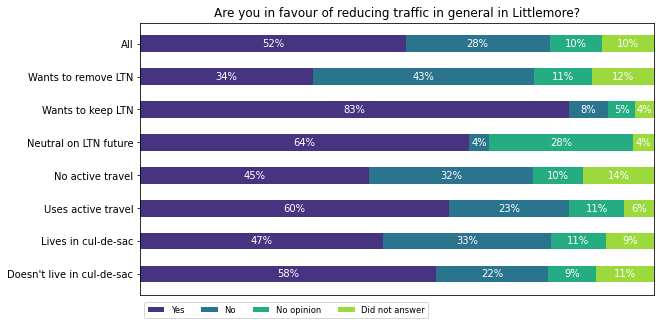

In [178]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap()(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(
            labels, widths, left=starts, height=0.5, label=colname, color=color
        )

        r, g, b, _ = color
        text_color = "white" if r * g * b < 0.5 else "darkgrey"
        ax.bar_label(rects, label_type="center", color=text_color, fmt="%.0f%%")
    # ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc="lower left", fontsize="small")
    ax.legend(
        ncol=len(category_names),
        bbox_to_anchor=(0, -0.1),
        loc="lower left",
        fontsize="small",
    )

    return fig, ax


category_names = ["Yes", "No", "No opinion", "Did not answer"]
survey(results, category_names)
plt.title("Are you in favour of reducing traffic in general in Littlemore?")
plt.savefig("img/01_reducing_traffic.png", bbox_inches="tight")
plt.show()

# Question 4 - LTN impact on households

Here we are going to ignore the 15\% of respondants that did not answer this question. I expect the placement of this question right at the very top of the page caused some people to miss it. 

In [179]:
# %age respondents who missed question 4
100 * df["4_ltn_impact"].isna().astype(int).sum() / len(df)

15.151515151515152

In [180]:
df["school_run_drive"] = (
    df["3_drive_reasons"].str.contains("School run").fillna(value=False)
)

In [181]:
df["school_run_drive"].value_counts()

False    424
True     104
Name: school_run_drive, dtype: int64

In [182]:
qu4_results = {
    "All": df["4_ltn_impact"]
    .value_counts(dropna=True, normalize=True)
    .sort_index()
    .tolist()
}
qu4_results = {k: list(map(lambda x: x * 100, v)) for k, v in qu4_results.items()}
qu4_results

{'All': [10.044642857142858,
  7.142857142857142,
  11.607142857142858,
  17.633928571428573,
  53.57142857142857]}

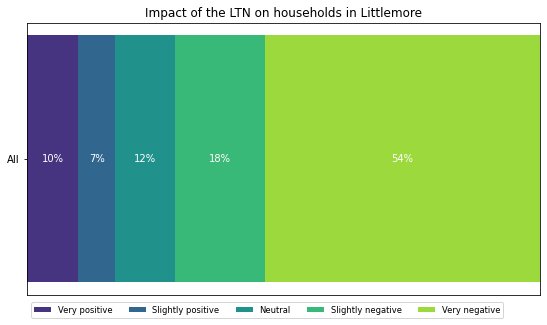

In [183]:
qu4_category_names = [
    "Very positive",
    "Slightly positive",
    "Neutral",
    "Slightly negative",
    "Very negative",
]
survey(qu4_results, qu4_category_names)
plt.title("Impact of the LTN on households in Littlemore")
plt.show()

## Let's try adding some more categories

In [184]:
school_run = (
    df.groupby("school_run_drive")["4_ltn_impact"]
    .value_counts(dropna=True, normalize=True)
    .sort_index()
)
school_run

school_run_drive  4_ltn_impact
False             1.0             0.120787
                  2.0             0.078652
                  3.0             0.129213
                  4.0             0.168539
                  5.0             0.502809
True              1.0             0.021739
                  2.0             0.043478
                  3.0             0.065217
                  4.0             0.206522
                  5.0             0.663043
Name: 4_ltn_impact, dtype: float64

In [185]:
qu4_results["Has driving school run"] = [100 * i for i in school_run[True].tolist()]
qu4_results["No driving school run"] = [100 * i for i in school_run[False].tolist()]
qu4_results

{'All': [10.044642857142858,
  7.142857142857142,
  11.607142857142858,
  17.633928571428573,
  53.57142857142857],
 'Has driving school run': [2.1739130434782608,
  4.3478260869565215,
  6.521739130434782,
  20.652173913043477,
  66.30434782608695],
 'No driving school run': [12.07865168539326,
  7.865168539325842,
  12.921348314606742,
  16.853932584269664,
  50.28089887640449]}

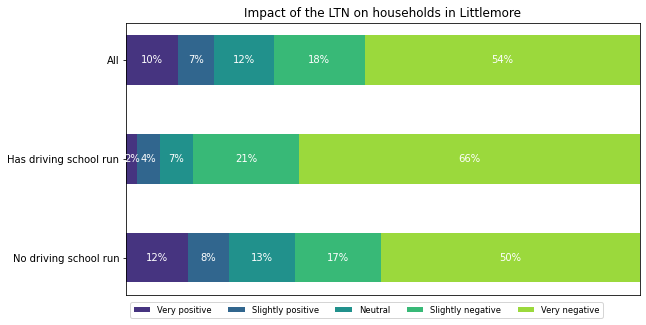

In [186]:
survey(qu4_results, qu4_category_names)
plt.title("Impact of the LTN on households in Littlemore")
plt.show()

In [187]:
active_travel = (
    df.groupby("active_travel_after_bool")["4_ltn_impact"]
    .value_counts(dropna=True, normalize=True)
    .sort_index()
)
active_travel

active_travel_after_bool  4_ltn_impact
False                     1.0             0.052632
                          2.0             0.048246
                          3.0             0.109649
                          4.0             0.179825
                          5.0             0.609649
True                      1.0             0.150000
                          2.0             0.095455
                          3.0             0.122727
                          4.0             0.172727
                          5.0             0.459091
Name: 4_ltn_impact, dtype: float64

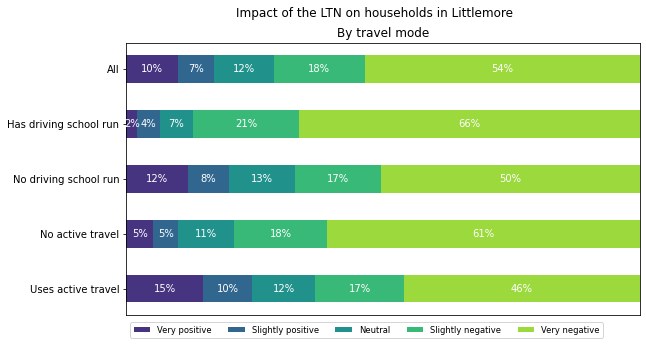

In [188]:
qu4_results["No active travel"] = [100 * i for i in active_travel[False].tolist()]
qu4_results["Uses active travel"] = [100 * i for i in active_travel[True].tolist()]
survey(qu4_results, qu4_category_names)
plt.suptitle("Impact of the LTN on households in Littlemore")
plt.title("By travel mode")
plt.savefig("img/02_ltn_impact_travel_mode.png", bbox_inches="tight")
plt.show()

In [189]:
df["inside_ltn"].astype(float).sum()

101.0

In [190]:
df["borders_ltn"].astype(float).sum()

42.0

In [191]:
df["outside_ltn"].astype(float).sum()

385.0

## Want to explore driving distance to LTN vs impact

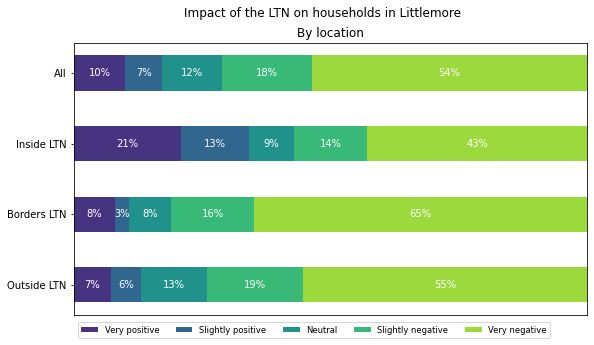

In [192]:
qu4_results_location = {
    "All": qu4_results["All"],
    "Inside LTN": [
        100 * i
        for i in df.groupby("inside_ltn")["4_ltn_impact"]
        .value_counts(dropna=True, normalize=True)
        .sort_index()[True]
        .tolist()
    ],
    "Borders LTN": [
        100 * i
        for i in df.groupby("borders_ltn")["4_ltn_impact"]
        .value_counts(dropna=True, normalize=True)
        .sort_index()[True]
        .tolist()
    ],
    "Outside LTN": [
        100 * i
        for i in df.groupby("outside_ltn")["4_ltn_impact"]
        .value_counts(dropna=True, normalize=True)
        .sort_index()[True]
        .tolist()
    ],
}
survey(qu4_results_location, qu4_category_names)
plt.suptitle("Impact of the LTN on households in Littlemore")
plt.title("By location")
plt.savefig("img/03_ltn_impact_location.png", bbox_inches="tight")
plt.show()

In [193]:
impact_dict = dict(zip(range(1, 6), qu4_category_names))
impact_dict

{1: 'Very positive',
 2: 'Slightly positive',
 3: 'Neutral',
 4: 'Slightly negative',
 5: 'Very negative'}

In [194]:
df["4_ltn_impact_category"] = pd.Categorical(
    df["4_ltn_impact"].map(impact_dict), categories=qu4_category_names
)
df[["4_ltn_impact", "4_ltn_impact_category"]]

,4_ltn_impact,4_ltn_impact_category
0,5.0,Very negative
1,5.0,Very negative
2,4.0,Slightly negative
3,5.0,Very negative
4,5.0,Very negative
...,...,...
523,NaN,NaN
524,5.0,Very negative
525,4.0,Slightly negative
526,5.0,Very negative


In [195]:
qu4_category_names

['Very positive',
 'Slightly positive',
 'Neutral',
 'Slightly negative',
 'Very negative']

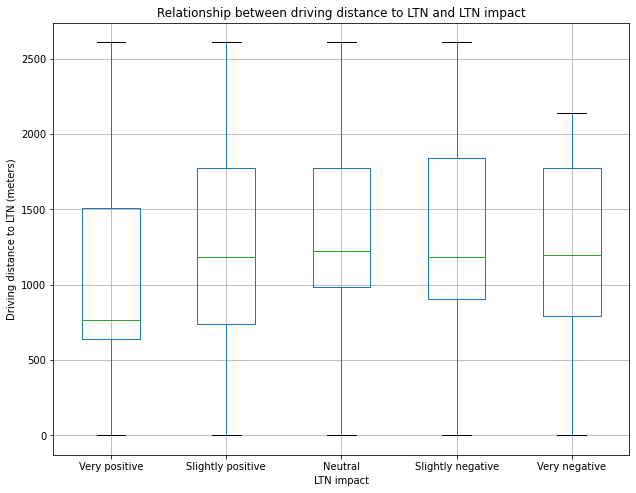

In [196]:
fig, ax = plt.subplots(figsize=(10, 8))
boxplot = df.boxplot(
    column=["driving_distance_to_ltn_meters"],
    by="4_ltn_impact_category",
    ax=ax,
    return_type="axes",
)
# Do some label and title tweaking
[ax_tmp.set_xlabel("LTN impact") for ax_tmp in np.asarray(boxplot).reshape(-1)]
[
    ax_tmp.set_ylabel("Driving distance to LTN (meters)")
    for ax_tmp in np.asarray(boxplot).reshape(-1)
]
[
    ax_tmp.set_title("Relationship between driving distance to LTN and LTN impact")
    for ax_tmp in np.asarray(boxplot).reshape(-1)
]  #
fig = np.asarray(boxplot).reshape(-1)[0].get_figure()
fig.suptitle("")
plt.savefig("img/04_ltn_impact_distance.png", bbox_inches="tight")
plt.show()

This box plot isn't that revealing, will try a distance vs. impact score scatter plot instead

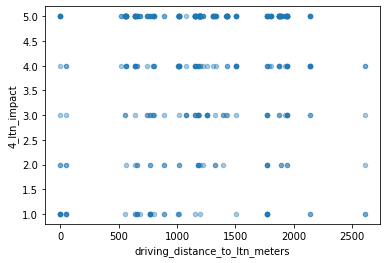

In [197]:
ax1 = df.plot.scatter(x="driving_distance_to_ltn_meters", y="4_ltn_impact", alpha=0.4)

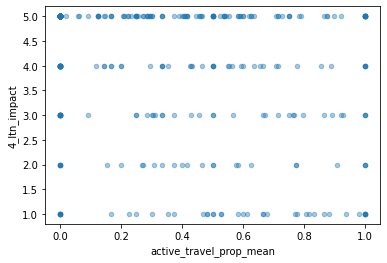

In [198]:
ax1 = df.plot.scatter(x="active_travel_prop_mean", y="4_ltn_impact", alpha=0.4)

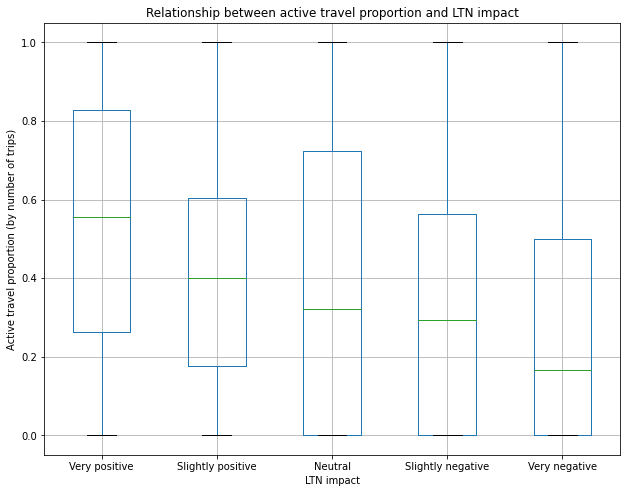

In [199]:
fig, ax = plt.subplots(figsize=(10, 8))
boxplot = df.boxplot(
    column=["active_travel_prop_mean"],
    by="4_ltn_impact_category",
    ax=ax,
    return_type="axes",
)
# Do some label and title tweaking
[ax_tmp.set_xlabel("LTN impact") for ax_tmp in np.asarray(boxplot).reshape(-1)]
[
    ax_tmp.set_ylabel("Active travel proportion (by number of trips)")
    for ax_tmp in np.asarray(boxplot).reshape(-1)
]
[
    ax_tmp.set_title("Relationship between active travel proportion and LTN impact")
    for ax_tmp in np.asarray(boxplot).reshape(-1)
]  #
fig = np.asarray(boxplot).reshape(-1)[0].get_figure()
fig.suptitle("")
plt.savefig("img/11_ltn_impact_active_travel_prop.png", bbox_inches="tight")
plt.show()

# Qu 5: opinions on individual filters

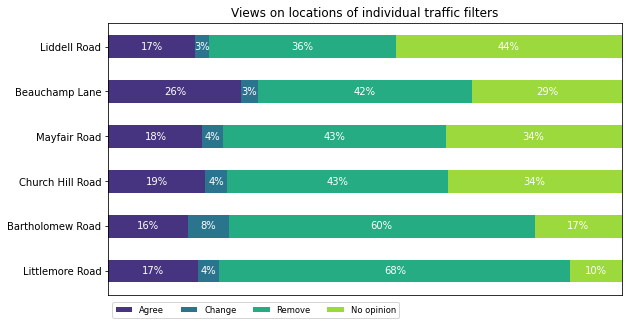

In [200]:
filter_category_order = ["Agree", "Change", "Remove", "No opinion"]
qu5_results = {
    "Liddell Road": df["5_liddell_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Beauchamp Lane": df["5_beauchamp_lane"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Mayfair Road": df["5_mayfair_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Church Hill Road": df["5_church_hill_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Bartholomew Road": df["5_bartholomew_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Littlemore Road": df["5_littlemore_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
}

qu5_results = {
    k: list(map(lambda x: x * 100, v)) for k, v in qu5_results.items()
}  # Convert to percentages
survey(qu5_results, filter_category_order)
plt.title("Views on locations of individual traffic filters")
plt.savefig("img/05_individual_filters.png", bbox_inches="tight")
plt.show()

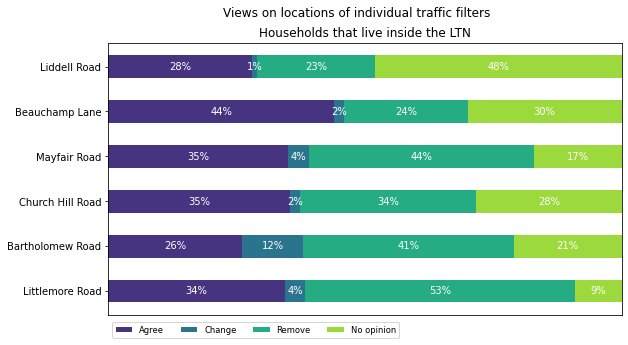

In [201]:
qu5_results_inside_ltn = {
    "Liddell Road": df[df["inside_ltn"] == True]["5_liddell_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Beauchamp Lane": df[df["inside_ltn"] == True]["5_beauchamp_lane"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Mayfair Road": df[df["inside_ltn"] == True]["5_mayfair_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Church Hill Road": df[df["inside_ltn"] == True]["5_church_hill_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Bartholomew Road": df[df["inside_ltn"] == True]["5_bartholomew_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Littlemore Road": df[df["inside_ltn"] == True]["5_littlemore_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
}

qu5_results_inside_ltn = {
    k: list(map(lambda x: x * 100, v)) for k, v in qu5_results_inside_ltn.items()
}  # Convert to percentages
survey(qu5_results_inside_ltn, filter_category_order)
plt.suptitle("Views on locations of individual traffic filters")
plt.title("Households that live inside the LTN")
plt.savefig("img/06_individual_filters_inside_ltn.png", bbox_inches="tight")
plt.show()

In [202]:
len(df[df["inside_ltn"] == True])

101

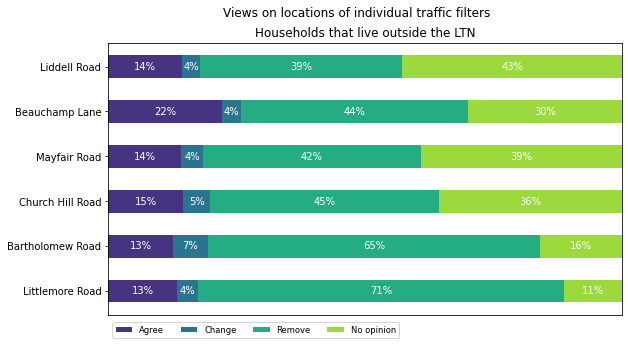

In [203]:
qu5_results_outside_ltn = {
    "Liddell Road": df[df["outside_ltn"] == True]["5_liddell_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Beauchamp Lane": df[df["outside_ltn"] == True]["5_beauchamp_lane"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Mayfair Road": df[df["outside_ltn"] == True]["5_mayfair_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Church Hill Road": df[df["outside_ltn"] == True]["5_church_hill_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Bartholomew Road": df[df["outside_ltn"] == True]["5_bartholomew_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Littlemore Road": df[df["outside_ltn"] == True]["5_littlemore_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
}

qu5_results_outside_ltn = {
    k: list(map(lambda x: x * 100, v)) for k, v in qu5_results_outside_ltn.items()
}  # Convert to percentages
survey(qu5_results_outside_ltn, filter_category_order)
plt.suptitle("Views on locations of individual traffic filters")
plt.title("Households that live outside the LTN")
plt.savefig("img/07_individual_filters_outside_ltn.png", bbox_inches="tight")
plt.show()

In [204]:
len(df[df["outside_ltn"] == True])

385

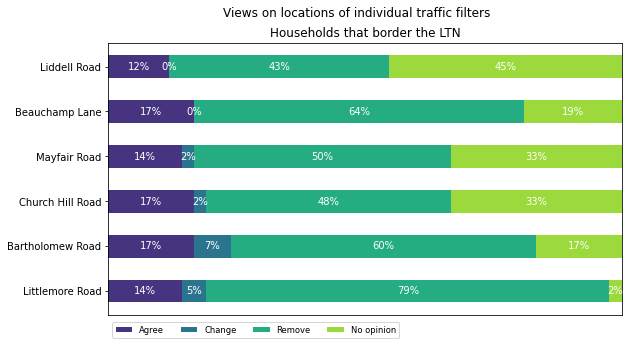

In [205]:
# Only 40ish in this category so sometimes some categories are missing; add these manually with a pd.Series.append call
qu5_results_borders_ltn = {
    "Liddell Road": df[df["borders_ltn"] == True]["5_liddell_road"]
    .value_counts(dropna=True, normalize=True)
    .append(pd.Series([0.0], index=["Change"]))[filter_category_order]
    .tolist(),
    "Beauchamp Lane": df[df["borders_ltn"] == True]["5_beauchamp_lane"]
    .value_counts(dropna=True, normalize=True)
    .append(pd.Series([0.0], index=["Change"]))[filter_category_order]
    .tolist(),
    "Mayfair Road": df[df["borders_ltn"] == True]["5_mayfair_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Church Hill Road": df[df["borders_ltn"] == True]["5_church_hill_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Bartholomew Road": df[df["borders_ltn"] == True]["5_bartholomew_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
    "Littlemore Road": df[df["borders_ltn"] == True]["5_littlemore_road"]
    .value_counts(dropna=True, normalize=True)[filter_category_order]
    .tolist(),
}

qu5_results_borders_ltn = {
    k: list(map(lambda x: x * 100, v)) for k, v in qu5_results_borders_ltn.items()
}  # Convert to percentages
survey(qu5_results_borders_ltn, filter_category_order)
plt.suptitle("Views on locations of individual traffic filters")
plt.title("Households that border the LTN")
plt.savefig("img/08_individual_filters_border_ltn.png", bbox_inches="tight")
plt.show()

In [206]:
len(df[df["borders_ltn"] == True])

42

## Nuance on filter views

In [207]:
conditions = [
    (df["5_liddell_road"] == "Agree")
    & (df["5_beauchamp_lane"] == "Agree")
    & (df["5_mayfair_road"] == "Agree")
    & (df["5_church_hill_road"] == "Agree")
    & (df["5_bartholomew_road"] == "Agree")
    & (df["5_littlemore_road"] == "Agree"),
    (df["5_liddell_road"] == "Change")
    & (df["5_beauchamp_lane"] == "Change")
    & (df["5_mayfair_road"] == "Change")
    & (df["5_church_hill_road"] == "Change")
    & (df["5_bartholomew_road"] == "Change")
    & (df["5_littlemore_road"] == "Change"),
    (df["5_liddell_road"] == "Remove")
    & (df["5_beauchamp_lane"] == "Remove")
    & (df["5_mayfair_road"] == "Remove")
    & (df["5_church_hill_road"] == "Remove")
    & (df["5_bartholomew_road"] == "Remove")
    & (df["5_littlemore_road"] == "Remove"),
    (df["5_liddell_road"] == "No opinion")
    & (df["5_beauchamp_lane"] == "No opinion")
    & (df["5_mayfair_road"] == "No opinion")
    & (df["5_church_hill_road"] == "No opinion")
    & (df["5_bartholomew_road"] == "No opinion")
    & (df["5_littlemore_road"] == "No opinion"),
]
values = ["Agree", "Change", "Remove", "No opinion"]
df["5_nuance"] = np.select(conditions, values)
df["5_nuance"].value_counts(dropna=False, normalize=True)

0             0.573864
Remove        0.270833
Agree         0.087121
No opinion    0.054924
Change        0.013258
Name: 5_nuance, dtype: float64

# Question 6: future of Cowley LTN

In [208]:
# %age respondents who missed question 6
100 * df["6_ltn_future"].isna().astype(int).sum() / len(df)

6.4393939393939394

In [209]:
df["6_ltn_future"].isna().astype(int).sum()

34

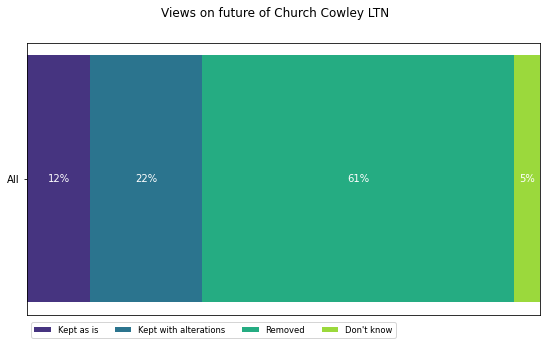

In [210]:
qu6_categories = ["Kept as is", "Kept with alterations", "Removed", "Don't know"]
qu6_results = {
    "All": [
        100 * i
        for i in df["6_ltn_future"]
        .value_counts(dropna=True, normalize=True)[qu6_categories]
        .tolist()
    ]
}
survey(qu6_results, qu6_categories)
plt.suptitle("Views on future of Church Cowley LTN")
plt.savefig("img/09_future_of_ltn.png", bbox_inches="tight")
plt.show()

In [211]:
# Let's pivot
df["6_ltn_future"] = pd.Categorical(
    df["6_ltn_future"], categories=qu6_categories
)  # helps get category order correct
pivot_table = df[["4_ltn_impact_category", "6_ltn_future"]].pivot_table(
    index="4_ltn_impact_category", columns="6_ltn_future", aggfunc=len
)
pivot_table

6_ltn_future,Kept as is,Kept with alterations,Removed,Don't know
4_ltn_impact_category,,,,
Very positive,33.0,9.0,2.0,NaN
Slightly positive,13.0,16.0,NaN,3.0
Neutral,6.0,23.0,7.0,13.0
Slightly negative,1.0,32.0,34.0,4.0
Very negative,NaN,17.0,213.0,NaN


In [212]:
pivot_table.columns.tolist()

['Kept as is', 'Kept with alterations', 'Removed', "Don't know"]

In [213]:
pivot_table.index.tolist()

['Very positive',
 'Slightly positive',
 'Neutral',
 'Slightly negative',
 'Very negative']

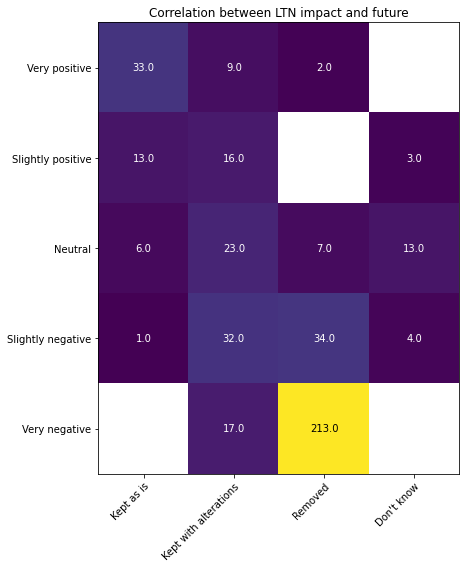

In [214]:
def pivot_table_heatplot(pivot_table):
    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(pivot_table)

    column_names = pivot_table.columns.tolist()
    row_names = pivot_table.index.tolist()

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(column_names)))
    ax.set_yticks(np.arange(len(row_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(column_names)
    ax.set_yticklabels(row_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i, c in enumerate(column_names):
        for j, r in enumerate(row_names):
            if r == "Very negative" and c == "Removed":
                text = ax.text(
                    i, j, pivot_table.loc[r, c], ha="center", va="center", color="k"
                )
            else:
                text = ax.text(
                    i, j, pivot_table.loc[r, c], ha="center", va="center", color="w"
                )

    ax.set_title("Correlation between LTN impact and future")
    fig.tight_layout()


pivot_table_heatplot(pivot_table)
plt.savefig("img/10_impact_and_future_of_ltn.png", bbox_inches="tight")

In [215]:
# Have a quick look at the two respondants who answered question 4 with "very positive" but want the LTNs removed
pd.set_option("display.max_columns", None)
df[(df["4_ltn_impact_category"] == "Very positive") & (df["6_ltn_future"] == "Removed")]

,street,Secondary street name,1_reduce_traffic,2_car_before,2_car_after,2_motorbike_before,2_motorbike_after,2_van_before,2_van_after,2_bus_before,2_bus_after,2_foot_before,2_foot_after,2_wheelchair_before,2_wheelchair_after,2_bike_before,2_bike_after,2_scooter_before,2_scooter_after,3_drive_reasons,4_ltn_impact,5_church_hill_road,5_beauchamp_lane,5_littlemore_road,5_mayfair_road,5_liddell_road,5_bartholomew_road,6_ltn_future,7_ltn_benefit,8_ltn_problem,9_consultation,10_traffic_ideas,Unnamed: 32,count,inside_ltn,borders_ltn,outside_ltn,in_littlemore_parish,cul_de_sac,postcode,latitude,longitude,driving_distance_to_ltn_meters,car_change,active_travel_before,active_travel_after,active_travel_change,total_trips_per_week_before,total_trips_per_week_after,active_travel_prop_before,active_travel_prop_after,active_travel_prop_mean,bus_change,6_ltn_future_simple,active_travel_after_bool,school_run_drive,4_ltn_impact_category,5_nuance
114,Cardinal Close,NaN,No,Many,Many,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Work, Shopping, Health appointments",1.0,No opinion,No opinion,Remove,No opinion,No opinion,Remove,Removed,None,Causes more traffic in my area as no short cut...,No,NaN,NaN,79,False,False,True,True,True,OX4 3UE,51.725083,-1.22227,655.7,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Remove,False,False,Very positive,0
416,Oxford Road,NaN,Yes,15,11,NaN,NaN,NaN,NaN,NaN,NaN,7,7,NaN,NaN,NaN,NaN,NaN,NaN,"Shopping, Health appointments",1.0,Remove,Remove,Remove,Remove,No opinion,Remove,Removed,None,They slow down traffic and push it to another ...,No,The first by getting rid of LTNs. On the Oxfor...,NaN,64,False,False,True,True,False,OX4 4PF,51.722730,-1.22426,1018.0,-4.0,7.0,7.0,0.0,22.0,18.0,0.318182,0.388889,0.353535,NaN,Remove,True,False,Very positive,0


## Responding to the County Consultation

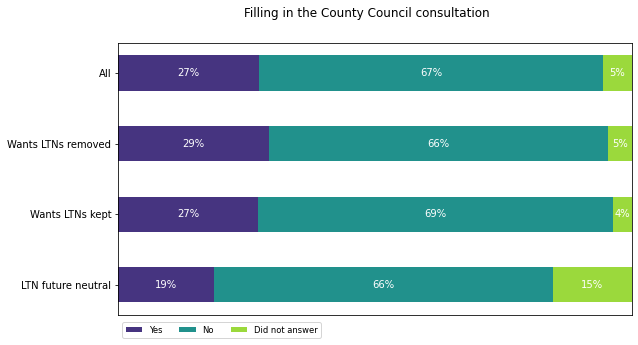

In [216]:
qu9_filter_category_order = ["Yes", "No", "Did not answer"]
df["9_consultation"] = df["9_consultation"].fillna("Did not answer")
qu9_results = {
    "All": df["9_consultation"]
    .value_counts(dropna=False, normalize=True)[qu9_filter_category_order]
    .tolist(),
    "Wants LTNs removed": df[df["6_ltn_future_simple"] == "Remove"]["9_consultation"]
    .value_counts(dropna=False, normalize=True)[qu9_filter_category_order]
    .tolist(),
    "Wants LTNs kept": df[df["6_ltn_future_simple"] == "Keep"]["9_consultation"]
    .value_counts(dropna=False, normalize=True)[qu9_filter_category_order]
    .tolist(),
    "LTN future neutral": df[
        (df["6_ltn_future_simple"] == "0") | (df["6_ltn_future_simple"] == "Neutral")
    ]["9_consultation"]
    .value_counts(dropna=False, normalize=True)[qu9_filter_category_order]
    .tolist(),
}
qu9_results = {k: list(map(lambda x: x * 100, v)) for k, v in qu9_results.items()}
qu9_results
survey(qu9_results, qu9_filter_category_order)
plt.suptitle("Filling in the County Council consultation")
plt.savefig("img/12_county_council_consultation.png", bbox_inches="tight")

# Question 7 & 8 (benefits and problems with LTNs)

Ideas:
- Simple bar charts for aggregated data
- "Empathy gap"? (i.e. antis not having good things to say, while pros can see the problems)
- Similarly - "Idea gap" with qu 10

In [217]:
qu7_responses = pd.read_csv("data/qu7_responses.csv", header=None)
qu7_responses.rename(columns={0: "Benefit", 1: "Frequency"}, inplace=True)
qu7_responses.head()

,Benefit,Frequency
0,No benefit,232
1,No response,61
2,Less traffic and noise,66
3,Road safety and health aspects,42
4,Safe cycling and walking,33


In [218]:
# Those giving a positive answer to this question
num_no_benefit = qu7_responses[qu7_responses["Benefit"] == "No benefit"][
    "Frequency"
].values[0]
num_no_response = qu7_responses[qu7_responses["Benefit"] == "No response"][
    "Frequency"
].values[0]
sum(qu7_responses["Frequency"]) - num_no_benefit - num_no_response

232

In [219]:
qu7_responses.set_index("Benefit", inplace=True)  # To get the y labels

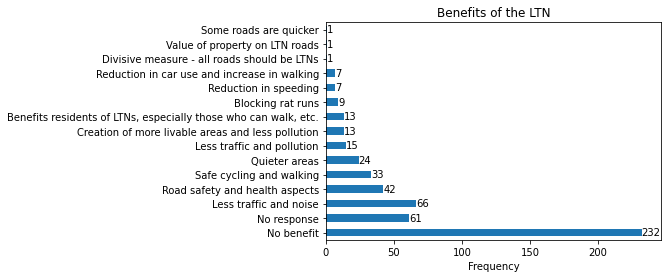

In [220]:
ax = qu7_responses.plot.barh()
ax.bar_label(ax.containers[0])
ax.get_legend().remove()
ax.set_title("Benefits of the LTN")
ax.set_xlim([0, 246])  # to fit largest count label on
ax.set_xlabel("Frequency")
ax.set_ylabel("")
plt.savefig("img/13_ltn_benefits.png", bbox_inches="tight")

In [221]:
qu8_responses = pd.read_csv("data/qu8_responses.csv", header=None)
qu8_responses.rename(columns={0: "Negative", 1: "Frequency"}, inplace=True)
qu8_responses

,Negative,Frequency
0,No response,34
1,None,8
2,Insufficient LTNs - should be joined up,1
3,"Increased journey times, including taxis, poll...",135
4,Traffic displacement - congestion / pollution,109
5,"General traffic build up, road safety /pollution",76
6,"Access issues to Cowley, residents feel cut off",31
7,"Traffic jams and congestion, increased polution",24
8,Access for emergency vehicles,15
9,General feelings of disenchantment and disrupt...,15


In [222]:
# Those giving a positive answer to this question
num_no_negatives = qu8_responses[qu8_responses["Negative"] == "None"][
    "Frequency"
].values[0]
num_no_response = qu8_responses[qu8_responses["Negative"] == "No response"][
    "Frequency"
].values[0]
sum(qu8_responses["Frequency"]) - num_no_negatives - num_no_response

483

In [223]:
qu8_responses.set_index("Negative", inplace=True)  # To get the y labels in the plot

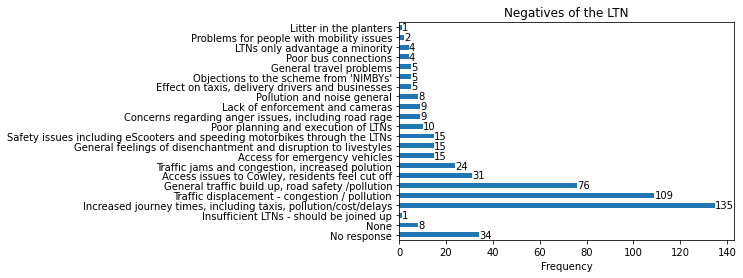

In [224]:
ax = qu8_responses.plot.barh()
ax.bar_label(ax.containers[0])
ax.get_legend().remove()
ax.set_title("Negatives of the LTN")
ax.set_xlim([0, 143])  # to fit largest count label on
ax.set_xlabel("Frequency")
ax.set_ylabel("")
plt.savefig("img/14_ltn_negatives.png", bbox_inches="tight")